In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D

### 이미지 준비

In [2]:
data_dir_son='C:/data/fifa-2022-all-players-image-dataset/Images/Images/Group H/South Korea Players/Images_Son Heung-min (captain)'

son_imgs=[]
dataset = data_dir_son
for folder in os.listdir(dataset): 
    son_imgs.append(folder)
len(son_imgs)

50

In [3]:
data_dir_lee='C:/data/fifa-2022-all-players-image-dataset/Images/Images/Group H/Portugal Players/Images_Danilo Pereira'
lee_imgs=[]
dataset = data_dir_lee
for folder in os.listdir(dataset): 
    lee_imgs.append(folder)
len(lee_imgs)

50

In [4]:
a=[]
for imag in son_imgs:
    arr=cv2.imread(os.path.join(data_dir_son,imag),cv2.IMREAD_GRAYSCALE)
    a.append(arr)

In [89]:
os.path.join(data_dir_son,imag)

'C:/data/fifa-2022-all-players-image-dataset/Images/Images/Group H/South Korea Players/Images_Son Heung-min (captain)\\Son Heung-min (captain)9.jpg'

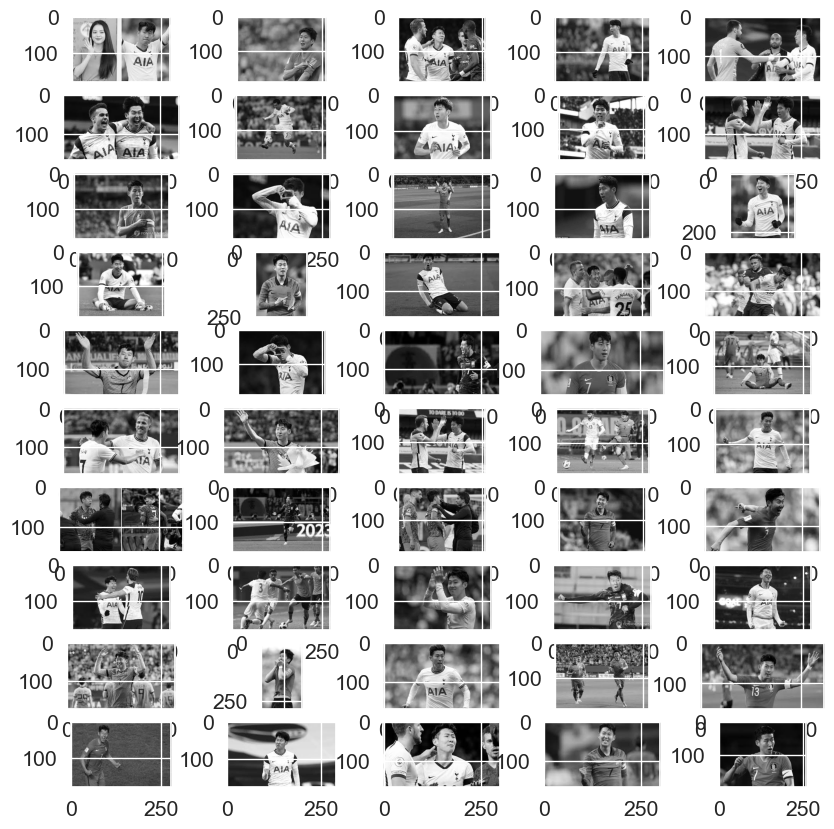

In [5]:
plt.figure(figsize=(10,10))
for i in range(len(a)):
    plt.subplot(10,5,i+1)
    plt.imshow(a[i],cmap='gray')

In [6]:
a2=[]
for image in lee_imgs:
    arr2=cv2.imread(os.path.join(data_dir_lee,image),cv2.IMREAD_GRAYSCALE)
    a2.append(arr2)

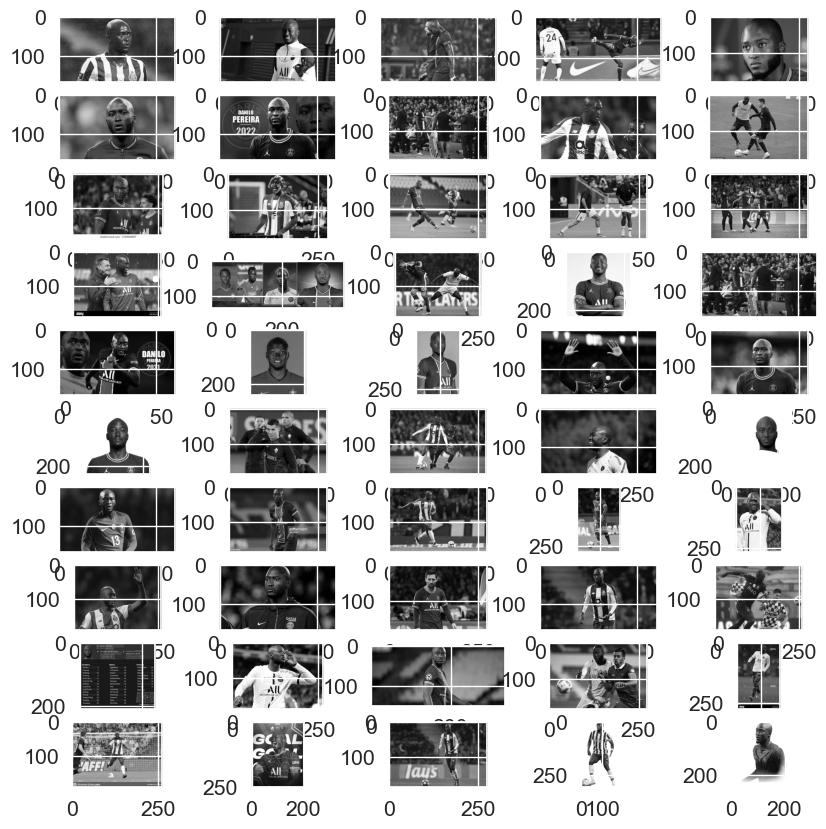

In [7]:
plt.figure(figsize=(10,10))
for i in range(len(a2)):
    plt.subplot(10,5,i+1)
    plt.imshow(a2[i],cmap='gray')

### 전처리

In [8]:
IMG_SIZE=90

In [9]:
training_data=[]

def create_training_data():
    
    for imag in son_imgs:
        arr=(os.path.join(data_dir_son,imag))
        im_arr=cv2.imread(os.path.join(data_dir_son,imag),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(im_arr,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,0])
        
    for imag2 in lee_imgs:
        arr=(os.path.join(data_dir_lee,imag2))
        im_arr2=cv2.imread(os.path.join(data_dir_lee,imag2),cv2.IMREAD_GRAYSCALE)
        new_array2=cv2.resize(im_arr2,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array2,1])

In [10]:
create_training_data()

In [11]:
len(training_data)

100

In [12]:
import random
random.shuffle(training_data)

In [13]:
for sample in training_data[:5]:
    print(sample[1])

0
1
1
0
0


In [14]:
for sample in training_data[:5]:
    print(sample[0])

[[ 76  80  74 ... 194 184 172]
 [ 80  85  78 ... 194 183 171]
 [ 86  90  84 ... 194 181 169]
 ...
 [ 52  50  39 ...  72 120 132]
 [ 46  44  33 ...  73 121 133]
 [ 53  50  38 ...  73 118 130]]
[[15 15 16 ... 55 54 36]
 [16 16 16 ... 57 61 55]
 [17 17 17 ... 55 57 58]
 ...
 [16 23 26 ... 17 13 13]
 [19 20 21 ... 15 13 13]
 [18 19 20 ... 15 13 13]]
[[ 48  44  53 ...  26  24  22]
 [ 35  38  45 ...  26  24  22]
 [ 32  44  47 ...  26  24  22]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[ 7  7  7 ... 11 10  9]
 [ 7  7  7 ... 12 11 11]
 [ 7  7  7 ... 13 12 12]
 ...
 [13 13 13 ... 11 12 14]
 [13 13 13 ... 10 11 12]
 [14 16 17 ...  8  8 10]]
[[ 73  46  38 ... 108 110 103]
 [ 86  67  41 ... 117 111 116]
 [ 78  80  39 ...  83 111 140]
 ...
 [ 22  23  24 ...  65  24  43]
 [ 22  23  24 ...  74  41  67]
 [ 19  26  25 ...  85  56  83]]


In [15]:
X=[]
y=[]
for features,label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [16]:
label_son,label_lee=0,0

for i in y:
    if i==0:
        label_son=label_son+1
    else:
        label_lee+=1
print(label_son)
print(label_lee)

50
50


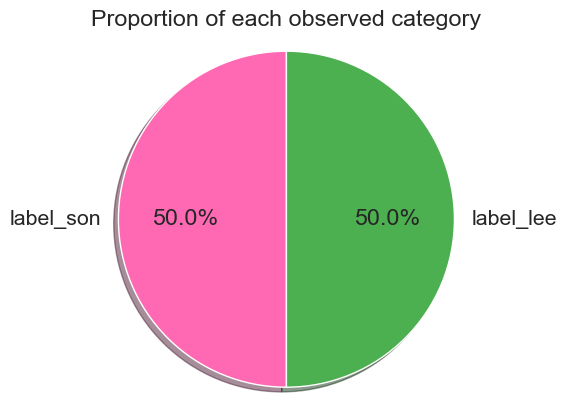

In [17]:
dt = np.array([label_son,label_lee])
mylabels = ["label_son",  "label_lee"]
myexplode = [0, 0]
mycolors = [ "hotpink",  "#4CAF50"]
plt.pie(dt, labels = mylabels,explode=myexplode,colors=mycolors,startangle =90,
        autopct='%1.1f%%', shadow = True)
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show() 

In [18]:
def display_random_image( images, labels):
    
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if labels[index]==0:
        plt.title('Image#{} : '.format(index) + "label_son")
    else:
        plt.title('Image#{} : '.format(index) + "label_lee")
    plt.show()

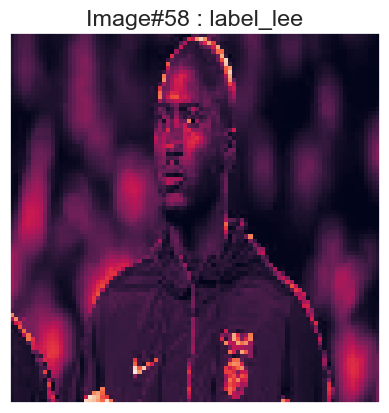

In [19]:
display_random_image( X, y)

In [20]:
def display_examples( images, labels):
    """
        Display 30 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(30):
        plt.subplot(5,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap="gray")
        plt.xlabel([labels[i]])
    plt.show()

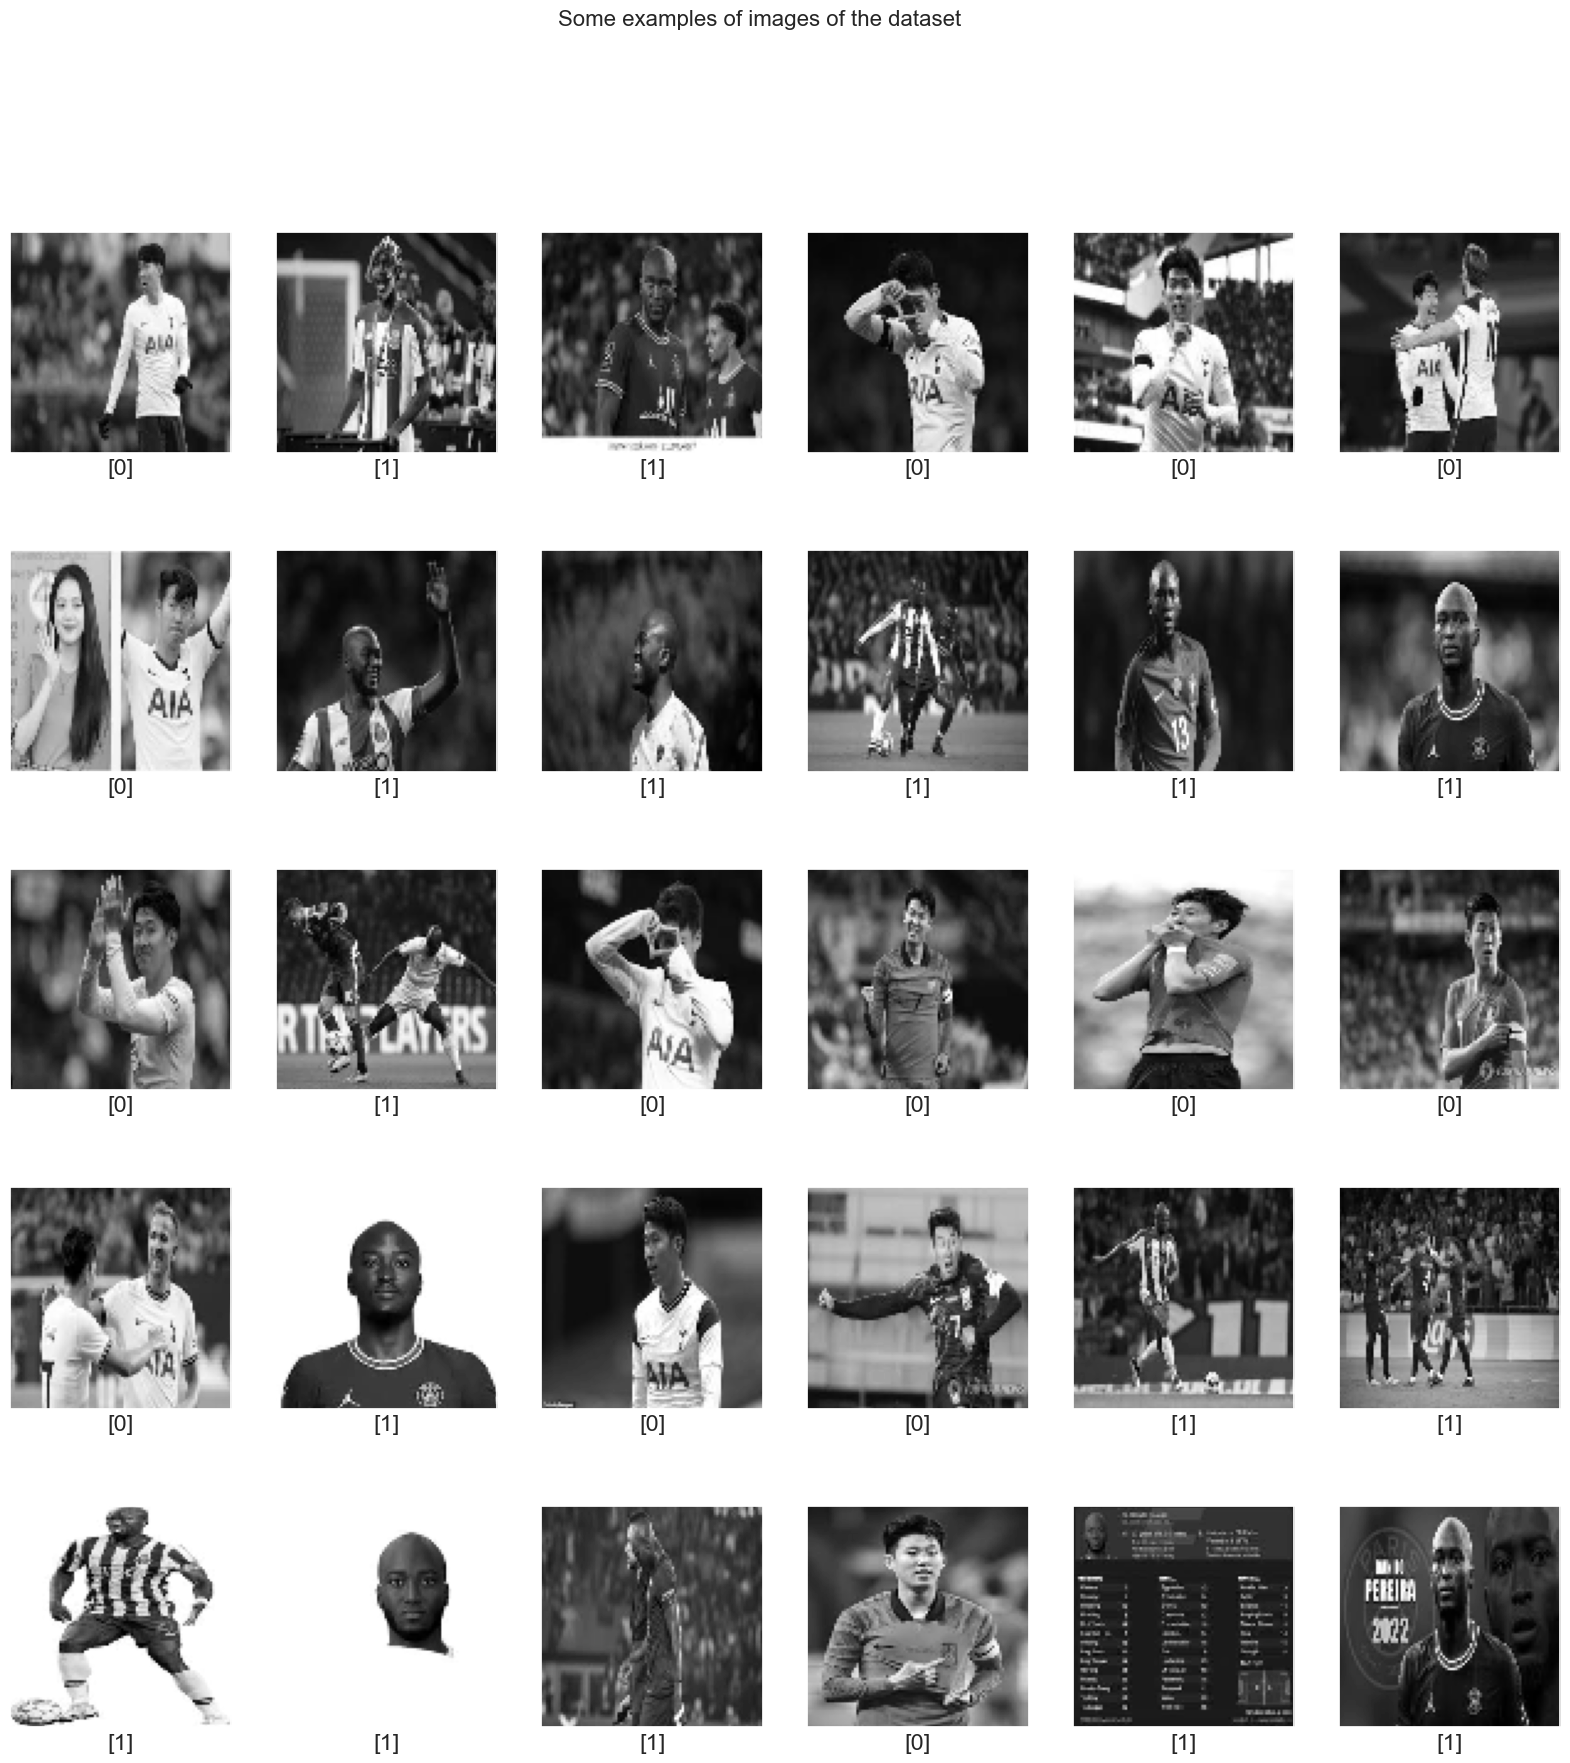

In [21]:
display_examples(X,y)

### 모델 제작

In [22]:
train_x=X/255.0
train_x=np.array(train_x)
y=np.array(y)

In [23]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = train_x.shape[1:])) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(64))
          
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [24]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [25]:
history= model.fit(train_x ,y,batch_size=32,epochs=10, validation_split = 0.1)

Epoch 1/10


3/3 [==============================] - 1s 147ms/step - loss: 1.7844 - accuracy: 0.4444 - val_loss: 0.9114 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 97ms/step - loss: 0.8669 - accuracy: 0.5000 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 91ms/step - loss: 0.6875 - accuracy: 0.5444 - val_loss: 0.6868 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 91ms/step - loss: 0.6355 - accuracy: 0.5222 - val_loss: 0.6681 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 96ms/step - loss: 0.5834 - accuracy: 0.7444 - val_loss: 0.6182 - val_accuracy: 0.8000
Epoch 6/10
3/3 [==============================] - 0s 99ms/step - loss: 0.4872 - accuracy: 0.8444 - val_loss: 0.5654 - val_accuracy: 0.8000
Epoch 7/10
3/3 [==============================] - 0s 99ms/step - loss: 0.4062 - accuracy: 0.8444 - val_loss: 0.6451 - val_accuracy: 0.6000
Epoch 8/10
3/3 [=====================

In [26]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_accuracy vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

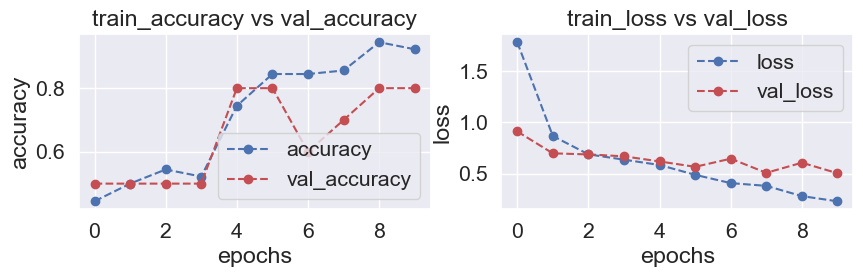

In [27]:
plot_accuracy_loss(history)

### 오차행렬표

### 추론

In [87]:
im_arr=cv2.imread('C:/data/sonlee/ck/Danilo Pereira6.jpg',cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(im_arr/255.0,(IMG_SIZE,IMG_SIZE))
img=np.reshape(new_array, (1,IMG_SIZE,IMG_SIZE,1))
result=model.predict(img)
if result <= 0.5:
    print('son')
elif result > 0.5:
    print('lee')
print(result)

1/1 [==============================] - 0s 16ms/step
lee
[[0.98682034]]
